In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy.stats as stat
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [ ]:
paras_mu = [1,10,20]
paras_sig = [2,2,3]
paras_pi = [0.3,0.2,0.5]
size = 3000

In [ ]:
a = []
for i in range(0,len(paras_mu)):
    a.append(norm.rvs(loc = paras_mu[i],scale = paras_sig[i],size= size))
a = np.array(a).T
t = []
for pi in range(0,size):
    z = [0,0,0]
    z[np.random.choice(3,p=paras_pi)] = 1
    t.append(z)


(array([ 5.,  5.,  7.,  9., 13., 14., 21., 26., 35., 38., 58., 55., 62.,
        58., 59., 58., 60., 52., 54., 46., 42., 32., 25., 19., 14.,  8.,
         6., 13., 12.,  9., 11., 14., 17., 19., 29., 36., 47., 36., 29.,
        32., 43., 35., 50., 43., 35., 31., 27., 16., 22., 13., 14., 14.,
        12., 14., 20., 29., 25., 28., 29., 43., 60., 50., 64., 64., 60.,
        77., 79., 73., 59., 63., 64., 67., 61., 66., 68., 35., 39., 29.,
        42., 37., 26., 21.,  4.,  8., 19.,  7., 12.,  7.,  2.,  1.,  3.,
         1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-4.30060011, -3.94499774, -3.58939537, -3.23379299, -2.87819062,
        -2.52258825, -2.16698587, -1.8113835 , -1.45578113, -1.10017876,
        -0.74457638, -0.38897401, -0.03337164,  0.32223073,  0.67783311,
         1.03343548,  1.38903785,  1.74464022,  2.1002426 ,  2.45584497,
         2.81144734,  3.16704972,  3.52265209,  3.87825446,  4.23385683,
         4.58945921,  4.94506158,  5.30066395,  5.65626632,  6.011868

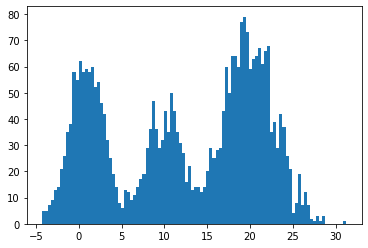

In [ ]:
r = np.sum(a*t,axis=1)
plt.hist(r,bins=100)

\begin{aligned} \phi_{j} &:=\frac{1}{m} \sum_{i=1}^{m} w_{j}^{(i)} \\ \mu_{j} &:=\frac{\sum_{i=1}^{m} w_{j}^{(i)} x^{(i)}}{\sum_{i=1}^{m} w_{j}^{(i)}} \\ \Sigma_{j} &:=\frac{\sum_{i=1}^{m} w_{j}^{(i)}\left(x^{(i)}-\mu_{j}\right)\left(x^{(i)}-\mu_{j}\right)^{T}}{\sum_{i=1}^{m} w_{j}^{(i)}} \end{aligned}

* phải có random assignment cho mỗi data point

In [ ]:
def mixgau(init_paras, n_iter, data):
    phi = np.array(init_paras["phi"],dtype = "float64")
    mu = np.array(init_paras["mu"],dtype = "float32")
    sig = np.array(init_paras["sig"],dtype = "float32")
    for _ in tqdm(range(0,n_iter)):
        a_ = []
        phi[2] = 1- phi[1] - phi[0]
        #lab = np.random.choice(3,p=phi,size=len(data),)
        for j in range(0,len(phi)):
            w = []
            ar = []
            data_j = data#[lab == j]
            for i in range(0,len(data_j)): 
            #e-step
                pX = (phi*norm.pdf(data_j[i],mu,np.sqrt(sig))).sum()
                a = (phi[j]*norm.pdf(data_j[i],mu[j],np.sqrt(sig[j])))
                w_j = a/pX
                w.append(w_j)
                ar.append(a)
            #m-step
            a_.append(ar)
            phi[j] = np.average(w)
            mu[j] = np.sum(w*data_j)/np.sum(w)
            sig[j] = np.dot(w*(data_j-mu[j]),(data_j-mu[j])) /np.sum(w)
            
        #print(np.sum(np.log(np.array(a_+ 0.00001).T), axis = 1).sum())
        print(phi,mu,sig)
    return phi, mu, sig
                 

In [ ]:
init_paras= {"phi" : [0.3,0.2,0.5], "mu":[1,7,14], "sig":[1,1,1]}
data = r
n_iter = 100
phi, mu, sig = mixgau(init_paras,n_iter,data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


[0.28096921 0.1232535  0.53650299] [ 0.7046993  8.304574  19.018427 ] [ 3.1469831  2.2701228 11.678763 ]
[0.2920865  0.14597649 0.54100689] [ 0.852899  8.991453 19.377905] [ 3.5964177  2.7071884 12.45778  ]
[0.295853   0.1650849  0.52936005] [ 0.909997  9.376957 19.542788] [ 3.811771   2.9539301 11.447281 ]
[0.29764013 0.17791828 0.5195448 ] [ 0.93842876  9.594006   19.688303  ] [ 3.9268465  3.1487806 10.483136 ]
[0.29843572 0.18625339 0.51251471] [ 0.9516378  9.7235565 19.791914 ] [3.9833815 3.3296978 9.803686 ]
[0.29867619 0.19169908 0.50788938] [ 0.95605654  9.803347   19.858545  ] [4.0044255 3.4954495 9.381026 ]
[0.29862139 0.19530482 0.50495625] [ 0.95570475  9.852481   19.899685  ] [4.0055814 3.6384797 9.129578 ]
[0.29843113 0.1977341  0.50310511] [ 0.95311445  9.882493   19.925013  ] [3.9970927 3.7552464 8.979953 ]
[0.29819957 0.19939913 0.5019207 ] [ 0.94979155  9.900795   19.94088   ] [3.9851763 3.8468068 8.888877 ]
[0.29797662 0.20055686 0.50114659] [ 0.94653815  9.912045   1

In [ ]:
print(phi)
print(mu)
print(sig)

[0.29714918 0.203415   0.49943582]
[ 0.9343469  9.932867  19.972971 ]
[3.9274955 4.113324  8.713641 ]


In [ ]:
[]

[]